In [1]:
%pylab inline
import ThonkTools as TT
from uncertainties import unumpy as unp
from uncertainties import ufloat
from scipy import interpolate
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [20]:
def csvReader(x):
    """
        csvReader takes a csv file and creats a list with lists of the colloms.
        It also turns strings into numbers if possible.
    """
    import csv
    with open(x, 'r') as csvFile:
        reader = csv.reader(csvFile)
        l = None
        for row in reader:
            if l == None:
                l = [[] for i in range(len(row))]
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
            else:
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
    return l    
    csvFile.close()

In [21]:
def Gaußfit_pm(x, y, p0=None):
    return TT.fit_pm(x, y, func=lambda x, A, s, c, d: A * (1 / (2 * pi * s**2)) * e**(-1/2 * ((x - c)/(s**2))**2) + d, p0=p0)
def Gaußfit(x, y, p0=None, r=None, d=None):
    return TT.fit(x, y, func=lambda x, A, s, c, d: A * (1 / (2 * pi * s**2)) * e**(-1/2 * ((x - c)/(s**2))**2) + d, r=r, d=d, p0=p0)

In [4]:
def Gauß(x,y,p0,r=None,d=None,Test=(None,None),Name='Test'):    
    
    ### FigureSize
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 7.5
    plt.rcParams["figure.figsize"] = fig_size
    
    ###   Errors / Fit / Plot
    x1, y1 = Gaußfit(x, y, p0, r=None, d=None)
    para = Gaußfit_pm(x, y, p0)
    if Test[1] == True:
        plt.plot(x, np.array(y))
        plt.plot(x1, y1)
        if Test[0] == True:
            x_test = arange(0,0.0001,0.000001)
            plt.plot(x_test,  p0[0] * (1 / (2 * pi * p0[1]**2)) * e**(-1/2 * ((x_test - p0[2])/(p0[1]**2))**2) + p0[3])
        else:
            None
        
        
        ###   Label / Title
        
        plt.ylabel(r'Voltage$\,[\mathrm{V}]$', fontsize=13)
        plt.xlabel(r'Time$\,[\mathrm{s}]$', fontsize=13)
        
        ###   Axes / Grid
        
        axes = plt.gca()  ##  Searches current Axes
        
        #axes.set_xlim([18.97,19.3])
        #axes.set_ylim([-300,370])
        
        #axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
        #axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
        
        axes.grid(which='major', linestyle='-', linewidth='1', color='black')
        axes.grid(which='minor', linestyle=':', color='gray')
        axes.minorticks_on()
        
        plt.legend(fontsize=15)
        plt.savefig(Name)
        plt.show()
    else:
        None
    return para

In [30]:
def easyGauß(x,N='?', farbe=None):
    p0 = []
    for i in range(len(x)):
        p0.append(x[i].nominal_value)
    x_axe = arange(0,0.000025,0.0000001)
    Name = 'Gauß-Fit für '+N
    plt.plot(x_axe, -p0[0] * (1 / (2 * pi * p0[1]**2)) * e**(-1/2 * ((x_axe - p0[2])/(p0[1]**2))**2), color=farbe,label=Name)

In [31]:
d1_1 = csvReader('F0000CH1.CSV')
d2_1 = csvReader('F0001CH1.CSV')
d3_1 = csvReader('F0002CH1.CSV')
d4_1 = csvReader('F0003CH1.CSV')
d5_1 = csvReader('F0004CH1.CSV')
d6_1 = csvReader('F0005CH1.CSV')
d7_1 = csvReader('F0006CH1.CSV')
d8_1 = csvReader('F0007CH1.CSV')

In [61]:
x_v_1, x_err_1 = Gauß(d1_1[3], d1_1[4], p0=[-0.0000005,0.002,0.00002,0.015], r=None, d=None, Test=(None,False))
x_v_2, x_err_2 = Gauß(d2_1[3], d2_1[4], p0=[-0.0000005,0.002,0.00002,0.015], r=None, d=None, Test=(None,False))
x_v_3, x_err_3 = Gauß(d3_1[3], d3_1[4], p0=[-0.0000005,0.002,0.00002,0.015], r=None, d=None, Test=(None,False))
x_v_4, x_err_4 = Gauß(d4_1[3], d4_1[4], p0=[-0.0000005,0.002,0.00002,0.015], r=None, d=None, Test=(None,False))
x_v_5, x_err_5 = Gauß(d5_1[3], d5_1[4], p0=[-0.0000005,0.002,0.00002,0.015], r=None, d=None, Test=(None,False))
x_v_6, x_err_6 = Gauß(d6_1[3], d6_1[4], p0=[-0.0000005,0.002,0.00002,0.015], r=None, d=None, Test=(None,False))
x_v_7, x_err_7 = Gauß(d7_1[3], d7_1[4], p0=[-0.0000005,0.002,0.00001,0.015], r=None, d=None, Test=(None,False))
x_v_8, x_err_8 = Gauß(d8_1[3], d8_1[4], p0=[-0.0000005,0.002,0.00001,0.015], r=None, d=None, Test=(None,False))

print(x_v_3)
print(x_v_4)

[-1.6083815894050707e-07+/-5.553877281619283e-09
 0.0010596962230809293+/-2.0268057839879712e-05
 1.758335806351204e-05+/-4.2017040970416694e-08
 -0.024510297161810704+/-0.0001282297218024186]
[-1.2951714188279618e-07+/-6.7821252979095725e-09
 0.0009364646129641417+/-2.7417327971272392e-05
 1.557732307252942e-05+/-5.0496697416678355e-08
 0.01588075727873384+/-0.00017717946008459541]


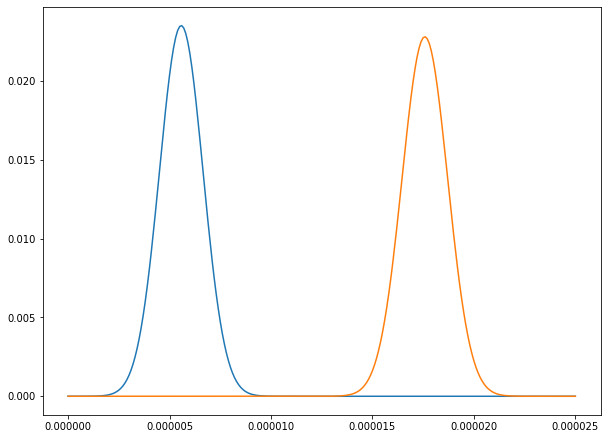

In [67]:
#easyGauß(x_v_3, N= r' $7\,[\mathrm{mm}]$', farbe='blue')
#easyGauß(x_v_4, N= r' $6\,[\mathrm{mm}]$')
p0 = []
x_axe = arange(0,0.000025,0.0000001)
plt.plot(x_axe, 1.2951714188279618e-07 * (1 / (2 * pi * 0.0009364646129641417**2)) * e**(-1/2 * ((x_axe - 0.557732307252942e-05)/(0.0010364646129641417**2))**2))
plt.plot(x_axe, 1.6083815894050707e-07 * (1 / (2 * pi * 0.0010596962230809293**2)) * e**(-1/2 * ((x_axe - 1.758335806351204e-05)/(0.0010596962230809293**2))**2))

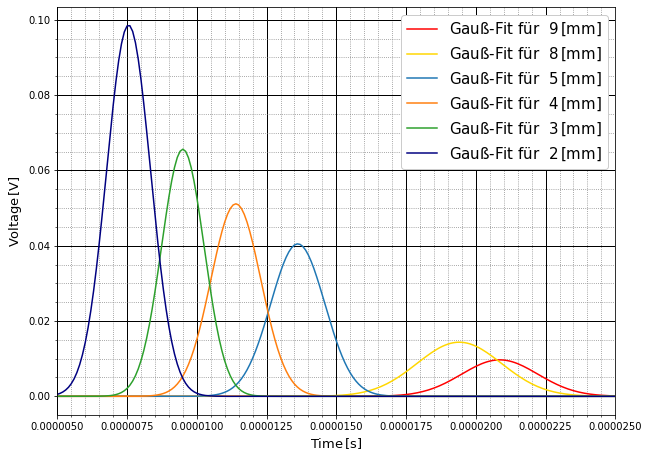

In [53]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

easyGauß(x_v_1, N= r' $9\,[\mathrm{mm}]$', farbe='red')
easyGauß(x_v_2, N= r' $8\,[\mathrm{mm}]$', farbe='gold')
#easyGauß(x_v_3, N= r' $7\,[\mathrm{mm}]$', farbe='blue')
#easyGauß(x_v_4, N= r' $6\,[\mathrm{mm}]$')
easyGauß(x_v_5, N= r' $5\,[\mathrm{mm}]$')
easyGauß(x_v_6, N= r' $4\,[\mathrm{mm}]$')
easyGauß(x_v_7, N= r' $3\,[\mathrm{mm}]$')
#easyGauß(x_v_13, N= r' $-32.0\,[\mathrm{V}]$')
easyGauß(x_v_8, N= r' $2\,[\mathrm{mm}]$', farbe='navy')
#easyGauß(x_v_9, N= r' $-40.0\,[\mathrm{V}]$', farbe='lawngreen')
#easyGauß(x_v_10, N= r' $-44.0\,[\mathrm{V}]$', farbe='darkviolet')
#easyGauß(x_v_11, N= r' $-46.0\,[\mathrm{V}]$', farbe='aqua')
#easyGauß(x_v_12, N= r' $-48.0\,[\mathrm{V}]$', farbe='darkred')


###   Label / Title

plt.ylabel(r'Voltage$\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'Time$\,[\mathrm{s}]$', fontsize=13)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([0.000005,0.000025])
#axes.set_ylim([-300,370])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15, framealpha=1)
plt.savefig('V2SPannung1.png')
plt.show()